In [190]:
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [191]:

def fetch_data_with_pagination(api_url, start_offset=0, row_limit=5000):
    all_rows = []
    while True:
        # Update the API URL with the current offset
        paginated_url = f"{api_url}&offset={start_offset}&length={row_limit}"
        response = requests.get(paginated_url)
        data = response.json()
        if 'response' in data and 'data' in data['response']:
            rows = data['response']['data']
            all_rows.extend(rows)

            # Break the loop if the number of rows returned is less than the row_limit
            if len(rows) < row_limit:
                break
            else:
                start_offset += row_limit
        else:
            break  # Break the loop if the expected data structure is not present

    return all_rows


base_url = 'https://api.eia.gov/v2/coal/shipments/plant-aggregates/data/?frequency=annual&data[0]=ash-content&data[1]=heat-content&data[2]=price&data[3]=quantity&data[4]=sulfur-content&start=2008&end=2022&sort[0][column]=period&sort[0][direction]=desc&api_key=HiERxZ9fQ1Lrp7k4SqeZiMFvUABbYucBDlqjOgZQ'


data_rows = fetch_data_with_pagination(base_url)

# Convert to DataFrame
df = pd.DataFrame(data_rows)

In [192]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,w,2008507,.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.85,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.9,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.63,3029643,.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,w,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.34,7957644,.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.23,12742961,.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,w,933486,.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,w,657652,.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [193]:
df.dtypes

period                   object
location                 object
plantStateDescription    object
plant                    object
plantName                object
rank                     object
coalRankDescription      object
ash-content              object
heat-content             object
price                    object
quantity                 object
sulfur-content           object
ash-content-units        object
heat-content-units       object
price-units              object
quantity-units           object
sulfur-content-units     object
dtype: object

In [194]:
# List of columns to convert
columns_to_convert = ['ash-content', 'heat-content', "sulfur-content", "quantity"]  # Replace with your actual column names

# Convert the listed columns to numeric, applying the same function to several columns
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [195]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                     object
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [196]:
df.duplicated().sum()

1098

In [197]:
df.drop_duplicates(inplace=True)

In [198]:
df.isnull().sum()

period                    0
location                  0
plantStateDescription     0
plant                     0
plantName                 0
rank                      0
coalRankDescription       0
ash-content               0
heat-content              0
price                    11
quantity                  0
sulfur-content            0
ash-content-units         0
heat-content-units        0
price-units               0
quantity-units            0
sulfur-content-units      0
dtype: int64

In [199]:
import pandas as pd
import numpy as np


df['price'] = df['price'].replace('w', np.nan, regex=False)


df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Display the updated DataFrame to verify the changes
print(df.head())


  period location      plantStateDescription  plant  \
0   2022       WY                    Wyoming    887   
1   2022      PAB  Pennsylvania (Bituminous)  56068   
2   2022      WVN   West Virginia (Northern)   8827   
3   2022       WY                    Wyoming   6641   
4   2022      WVN   West Virginia (Northern)   8226   

                             plantName rank coalRankDescription  ash-content  \
0                          Joppa Steam  SUB       Subbituminous         4.83   
1          Elm Road Generating Station  BIT          Bituminous         7.73   
2                         IMT Transfer  BIT          Bituminous         8.66   
3  Independence Steam Electric Station  TOT                 All         4.74   
4                 Cheswick Power Plant  BIT          Bituminous         9.62   

   heat-content  price  quantity  sulfur-content  ash-content-units  \
0          8890    NaN   2008507            0.22  percent by weight   
1         13011  65.85    547351            2.

In [200]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                    float64
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [201]:
df.isnull().sum()

period                      0
location                    0
plantStateDescription       0
plant                       0
plantName                   0
rank                        0
coalRankDescription         0
ash-content                 0
heat-content                0
price                    4867
quantity                    0
sulfur-content              0
ash-content-units           0
heat-content-units          0
price-units                 0
quantity-units              0
sulfur-content-units        0
dtype: int64

In [202]:
df['price'] = df['price'].interpolate()

In [203]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,WY,Wyoming,887,Joppa Steam,SUB,Subbituminous,4.83,8890,NaN,2008507,0.22,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.850000,547351,2.43,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.900000,1422382,2.97,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.630000,3029643,0.21,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,57.076667,114628,3.03,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.340000,7957644,0.56,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.230000,12742961,0.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,31.230000,933486,0.93,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,31.230000,657652,0.99,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [204]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    1
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [205]:
df.dropna(inplace=True)

In [206]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    0
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [207]:
selected_columns = ['period', 'location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription', 'ash-content',
                   'heat-content', 'price','quantity','sulfur-content']
new_df = df[selected_columns]

In [208]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,PAB,Pennsylvania (Bituminous),56068,Elm Road Generating Station,BIT,Bituminous,7.73,13011,65.850000,547351,2.43
2,2022,WVN,West Virginia (Northern),8827,IMT Transfer,BIT,Bituminous,8.66,11634,67.900000,1422382,2.97
3,2022,WY,Wyoming,6641,Independence Steam Electric Station,TOT,All,4.74,8921,43.630000,3029643,0.21
4,2022,WVN,West Virginia (Northern),8226,Cheswick Power Plant,BIT,Bituminous,9.62,12438,57.076667,114628,3.03
5,2022,OH,Ohio,8102,"Gavin Power, LLC",BIT,Bituminous,9.50,12530,70.523333,4596047,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,AZ,Arizona,4941,Navajo,BIT,Bituminous,10.05,10841,35.340000,7957644,0.56
19750,2008,WY,Wyoming,6002,James H Miller Jr,TOT,All,5.02,8700,31.230000,12742961,0.29
19751,2008,KYE,Kentucky (East),10672,Cedar Bay Generating Company LP,TOT,All,12.81,11973,31.230000,933486,0.93
19752,2008,WVN,West Virginia (Northern),10675,AES Thames,BIT,Bituminous,11.63,12409,31.230000,657652,0.99


In [209]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

categorical_columns = ['location', 'plantStateDescription', 'plant', 'plantName', 'rank', 'coalRankDescription']

In [210]:
encoder = LabelEncoder()
for col in categorical_columns:
    new_df[col] = encoder.fit_transform(new_df[col])

C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_8740\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = encoder.fit_transform(new_df[col])
C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_8740\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = encoder.fit_transform(new_df[col])
C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_8740\4124899301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [211]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,7.73,13011,65.850000,547351,2.43
2,2022,27,27,492,263,1,2,8.66,11634,67.900000,1422382,2.97
3,2022,29,29,435,267,4,0,4.74,8921,43.630000,3029643,0.21
4,2022,27,27,479,97,1,2,9.62,12438,57.076667,114628,3.03
5,2022,17,17,474,213,1,2,9.50,12530,70.523333,4596047,3.92
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,10.05,10841,35.340000,7957644,0.56
19750,2008,29,29,359,283,4,0,5.02,8700,31.230000,12742961,0.29
19751,2008,8,8,40,86,4,0,12.81,11973,31.230000,933486,0.93
19752,2008,27,27,42,10,1,2,11.63,12409,31.230000,657652,0.99


In [212]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['ash-content', 'heat-content', 'price', 'quantity', 'sulfur-content']


scaler = StandardScaler()


new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])



C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_8740\1969826805.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[numerical_columns] = scaler.fit_transform(new_df[numerical_columns])


In [213]:
new_df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content
1,2022,21,21,339,172,1,2,-0.283398,1.167776,0.350553,-0.740290,0.865455
2,2022,27,27,492,263,1,2,-0.098066,0.401863,0.437923,-0.314565,1.354050
3,2022,29,29,435,267,4,0,-0.879251,-1.107158,-0.596449,0.467409,-1.143216
4,2022,27,27,479,97,1,2,0.093245,0.849063,-0.023361,-0.950821,1.408339
5,2022,17,17,474,213,1,2,0.069331,0.900235,0.549728,1.229505,2.213617
...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,3,2,305,385,1,2,0.178936,-0.039218,-0.949764,2.865008,-0.826533
19750,2008,29,29,359,283,4,0,-0.823452,-1.230082,-1.124929,5.193188,-1.070831
19751,2008,8,8,40,86,4,0,0.728955,0.590421,-1.124929,-0.552426,-0.491755
19752,2008,27,27,42,10,1,2,0.493802,0.832932,-1.124929,-0.686626,-0.437467


In [214]:
# Split the data into features and target
X = new_df.drop('coalRankDescription', axis=1)  # Assuming 'rank' is the target variable
y = new_df['coalRankDescription']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [215]:

train_data = pd.concat([X_train, y_train], axis=1)

test_data = pd.concat([X_test, y_test], axis=1)

In [216]:
train_data

,period,location,plantStateDescription,plant,plantName,rank,ash-content,heat-content,price,quantity,sulfur-content,coalRankDescription
3949,2018,5,5,469,223,4,1.177339,0.365153,1.173107,-0.203511,-0.021256,0
13859,2010,28,28,452,123,1,0.276585,0.886329,2.140141,-0.452397,-0.428419,2
2446,2019,21,21,357,268,4,-0.303326,1.176675,0.246420,-0.972062,1.046416,0
8600,2014,28,28,7,436,1,-0.341190,1.086568,0.330096,-0.970778,-0.518899,2
9168,2013,8,8,74,134,4,-0.203685,0.870755,1.192712,1.119090,0.584965,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11745,2012,29,29,375,386,3,-0.785589,-1.400285,-1.046084,-0.688071,-1.061783,4
12425,2011,19,19,100,376,1,-0.249520,0.488633,-0.310757,-0.990596,-0.410322,2
5473,2016,27,27,424,377,1,-0.090094,0.988674,-0.232480,0.497243,2.050752,2
861,2021,21,21,77,219,4,-0.066181,0.678860,-0.488622,1.198406,1.372147,0


In [218]:
train_data.to_csv('train_dataSVM_NN.csv', index=False) 

In [217]:
test_data

,period,location,plantStateDescription,plant,plantName,rank,ash-content,heat-content,price,quantity,sulfur-content,coalRankDescription
9952,2013,29,29,249,16,3,-0.879251,-1.166117,-0.973631,0.245576,-1.125120,4
13595,2011,28,28,96,89,1,-0.329233,1.194474,0.358438,-0.279967,0.539725,2
2147,2020,29,29,512,35,4,-0.913129,-1.250662,-0.600818,0.735979,-1.143216,0
13220,2011,6,6,196,358,1,-0.008389,0.550930,0.104213,0.545941,1.752165,2
3847,2018,6,6,372,569,4,-0.159843,0.465828,0.645053,-0.461847,1.001176,0
...,...,...,...,...,...,...,...,...,...,...,...,...
436,2022,27,27,231,534,4,-0.297348,1.193362,-0.125931,-0.908371,0.720686,0
17596,2009,29,29,63,380,4,-0.897187,-1.338545,-1.590759,-0.416239,-1.088927,0
18124,2008,29,29,432,270,3,-0.592285,-1.167229,-0.477967,-0.809694,-0.790341,4
10720,2012,28,28,194,83,1,0.105202,0.816246,-0.440888,0.344983,2.213617,2


In [219]:
test_data.to_csv('test_dataSVM_NN.csv', index=False) 

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


kernels = ['linear', 'rbf', 'poly']

C_values = [0.1, 10, 100]

model_scores = {}

for kernel in kernels:
    for C_value in C_values:

        svm_classifier = SVC(kernel=kernel, C=C_value, random_state=42)


        svm_classifier.fit(X_train, y_train)

 
        y_pred = svm_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        model_key = f"{kernel}_kernel_C_{C_value}"
        model_scores[model_key] = accuracy

        print(f"Model {model_key} Accuracy: {accuracy:.4f}")


Model linear_kernel_C_0.1 Accuracy: 0.9987
Model linear_kernel_C_10 Accuracy: 0.9995
Model linear_kernel_C_100 Accuracy: 0.9995
Model rbf_kernel_C_0.1 Accuracy: 0.2353
Model rbf_kernel_C_10 Accuracy: 0.3436
Model rbf_kernel_C_100 Accuracy: 0.4570
Model poly_kernel_C_0.1 Accuracy: 0.2353
Model poly_kernel_C_10 Accuracy: 0.4235
Model poly_kernel_C_100 Accuracy: 0.6417


In [98]:

results = []

for kernel in kernels:
    for C_value in C_values:
     
        svm_classifier = SVC(kernel=kernel, C=C_value, random_state=42)

   
        svm_classifier.fit(X_train, y_train)


        y_pred = svm_classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

   
        results.append({
            'Kernel': kernel,
            'C Value': C_value,
            'Accuracy': accuracy
        })


results_df = pd.DataFrame(results)


In [99]:
results_df

,Kernel,C Value,Accuracy
0,linear,0.1,0.998660
1,linear,10.0,0.999464
2,linear,100.0,0.999464
3,rbf,0.1,0.235326
4,rbf,10.0,0.343608
5,rbf,100.0,0.456982
6,poly,0.1,0.235326
7,poly,10.0,0.423479
8,poly,100.0,0.641651


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\3077644558.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\3077644558.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\3077644558.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



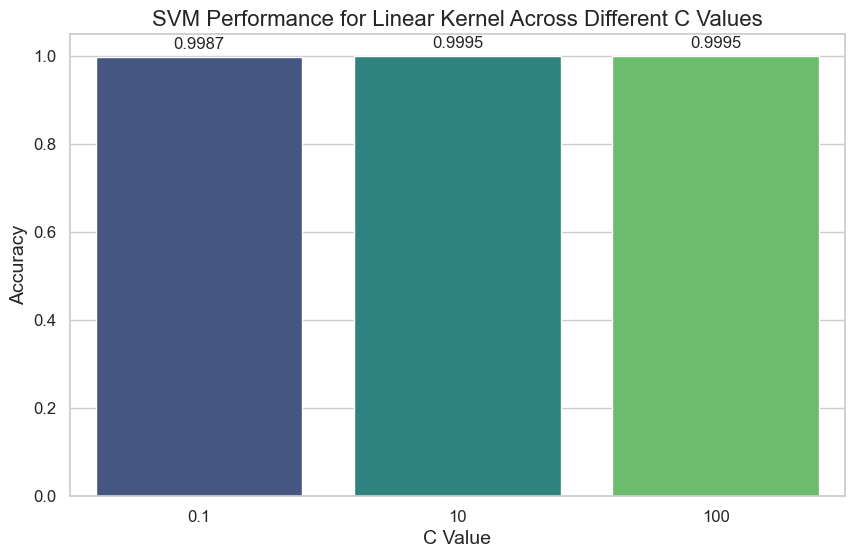

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  

linear_results = results_df[results_df['Kernel'] == 'linear']

# Convert C values to string for better categorical plotting
linear_results['C Value'] = linear_results['C Value'].astype(str)


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=linear_results,
    x='C Value', 
    y='Accuracy',
    palette='viridis'  
)

plt.title('SVM Performance for Linear Kernel Across Different C Values', fontsize=16)
plt.xlabel('C Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


bar_plot.set(xticklabels=['0.1', '10', '100'])


for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(format(height, '.4f'),  # Format the accuracy
                       (p.get_x() + p.get_width() / 2., height), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', fontsize=12)

plt.show()


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\2692505647.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\2692505647.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\2692505647.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



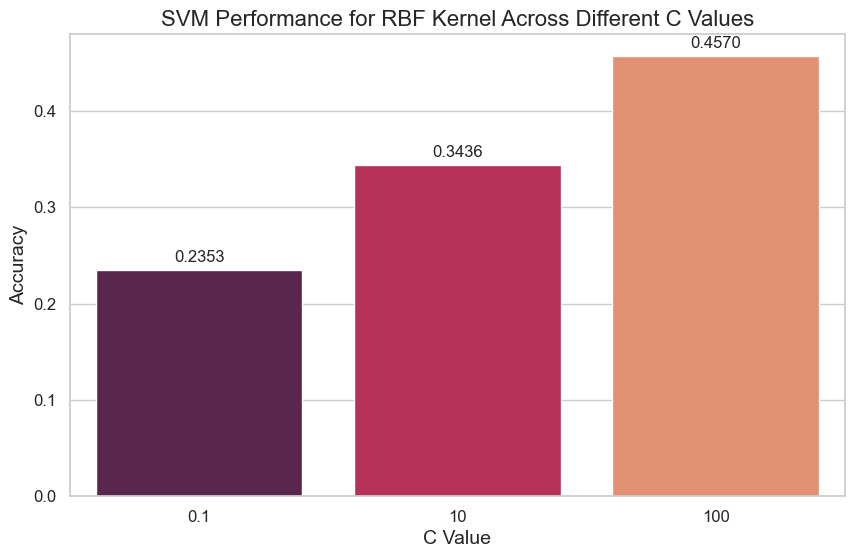

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(style="whitegrid")  

rbf_results = results_df[results_df['Kernel'] == 'rbf']


rbf_results['C Value'] = rbf_results['C Value'].astype(str)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=rbf_results,
    x='C Value', 
    y='Accuracy',
    palette='rocket' 
)

plt.title('SVM Performance for RBF Kernel Across Different C Values', fontsize=16)
plt.xlabel('C Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

bar_plot.set(xticklabels=['0.1', '10', '100'])

for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(format(height, '.4f'),  # Format the accuracy
                       (p.get_x() + p.get_width() / 2., height), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', fontsize=12)

# Show the plot
plt.show()


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\1887144315.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\1887144315.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\SAYAN ROY\AppData\Local\Temp\ipykernel_26236\1887144315.py:33: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



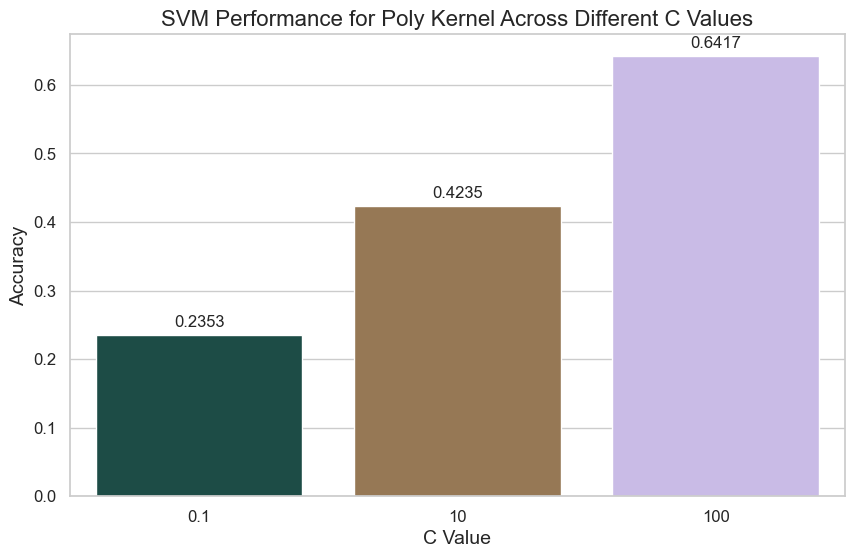

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  


rbf_results = results_df[results_df['Kernel'] == 'poly']


rbf_results['C Value'] = rbf_results['C Value'].astype(str)


plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    data=rbf_results,
    x='C Value', 
    y='Accuracy',
    palette='cubehelix'
)

plt.title('SVM Performance for Poly Kernel Across Different C Values', fontsize=16)
plt.xlabel('C Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


bar_plot.set(xticklabels=['0.1', '10', '100'])


for p in bar_plot.patches:
    height = p.get_height()
    bar_plot.annotate(format(height, '.4f'),  # Format the accuracy
                       (p.get_x() + p.get_width() / 2., height), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points', fontsize=12)


plt.show()


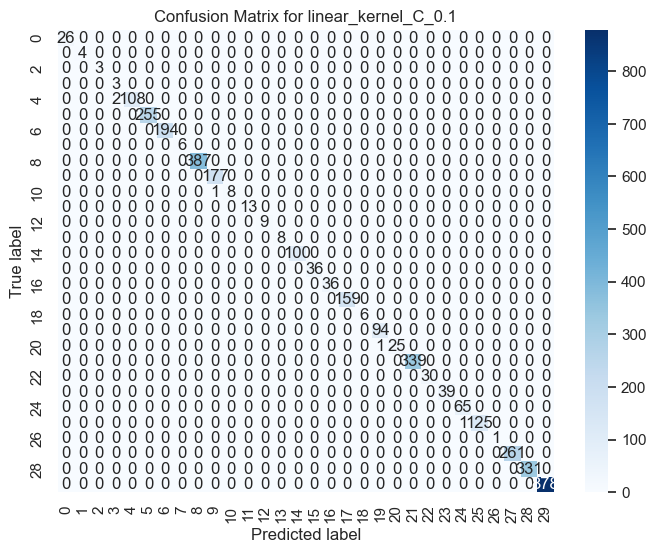

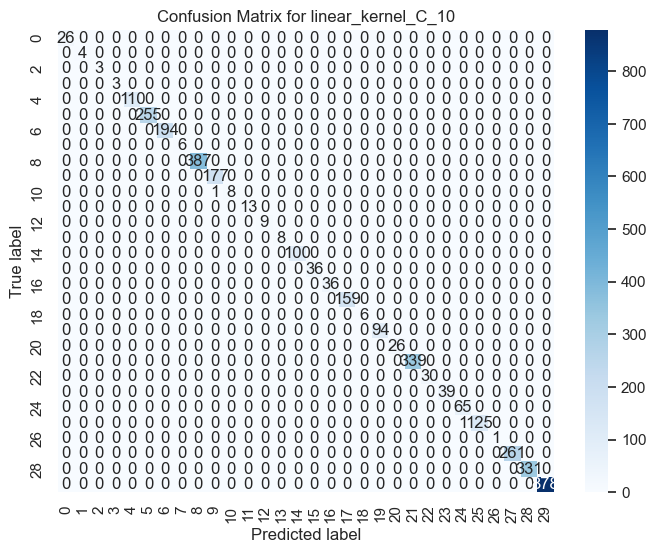

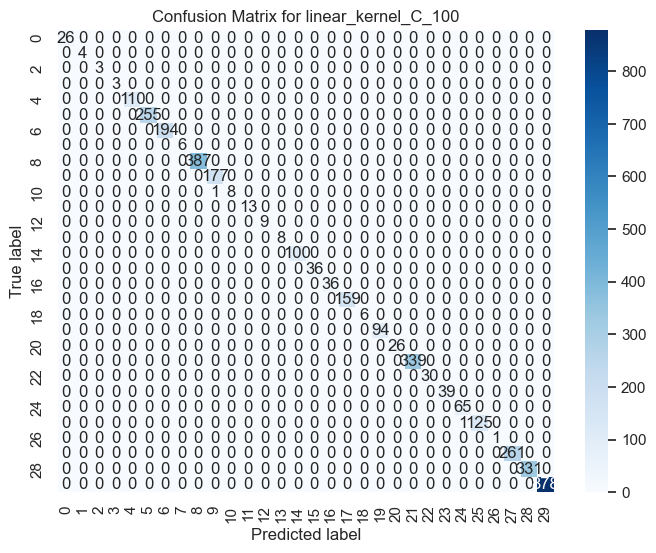

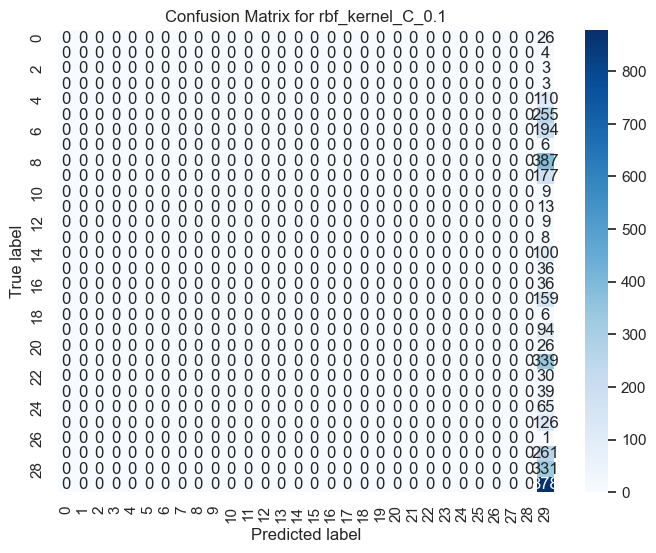

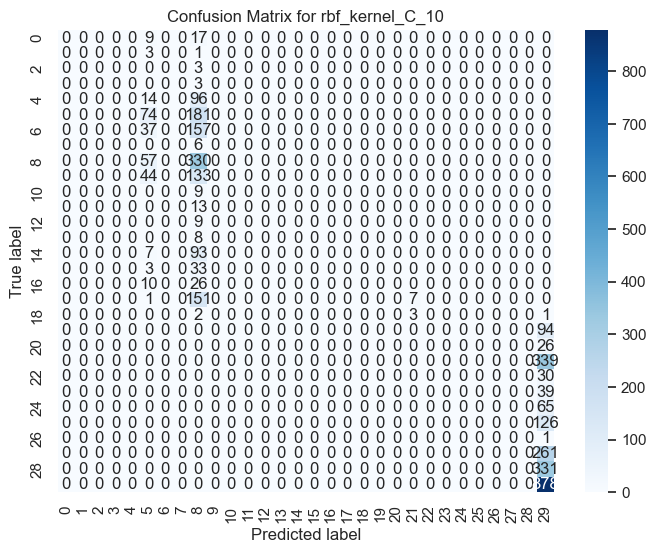

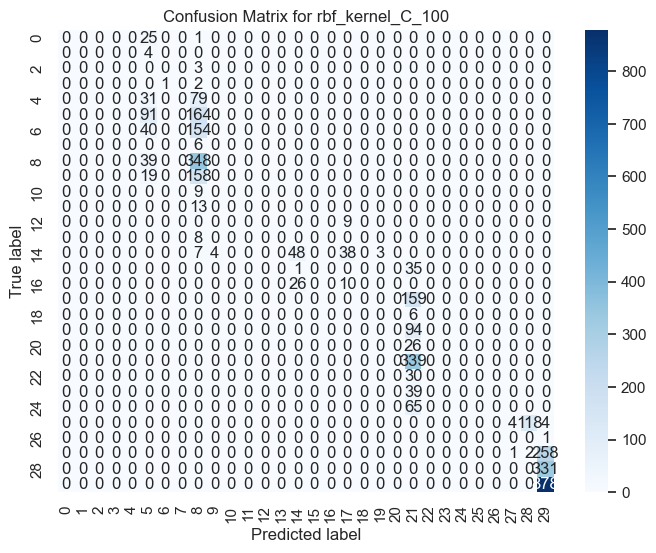

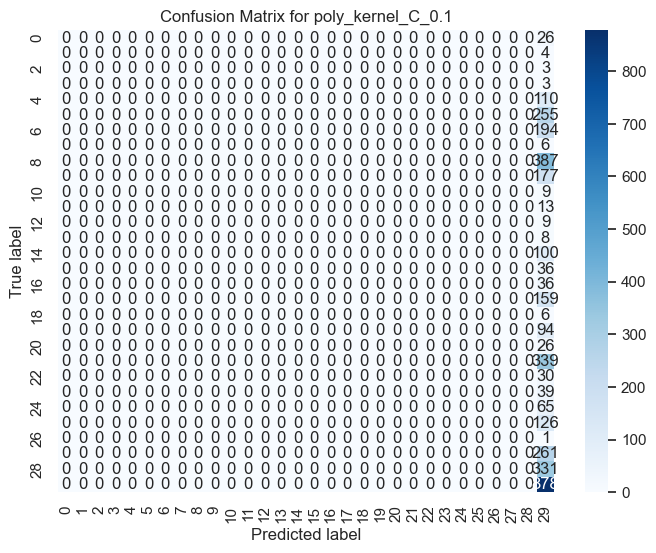

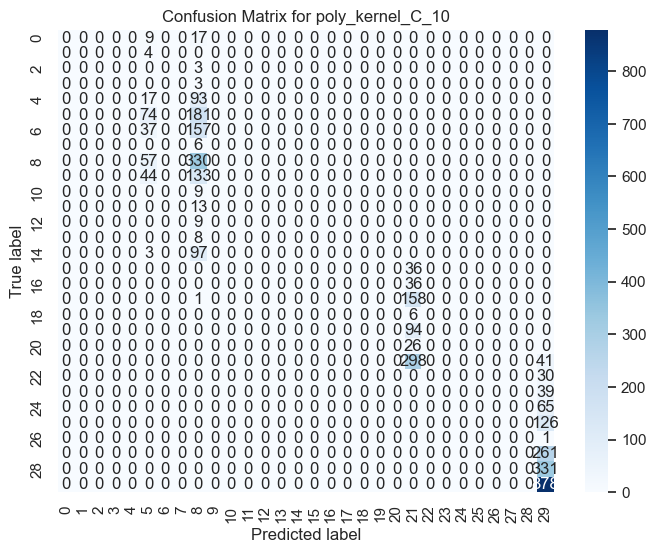

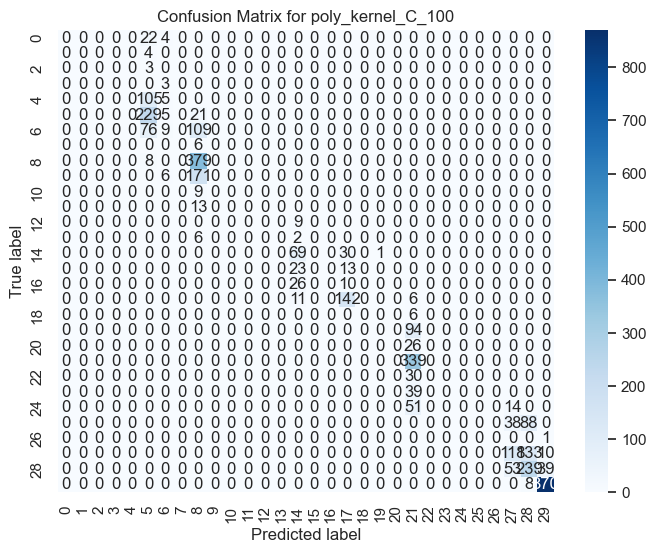

In [109]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly']

C_values = [0.1, 10, 100]

confusion_matrices = {}

for kernel in kernels:
    for C_value in C_values:
        svm_classifier = SVC(kernel=kernel, C=C_value, random_state=42)

        svm_classifier.fit(X_train, y_train)

        y_pred = svm_classifier.predict(X_test)


        cm = confusion_matrix(y_test, y_pred)

    
        model_key = f"{kernel}_kernel_C_{C_value}"
        confusion_matrices[model_key] = cm

    
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
        plt.title(f'Confusion Matrix for {model_key}')
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix



model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))  # 3 hidden units, ReLU activation
model.add(Dense(1, activation='sigmoid'))  # 1 output unit, sigmoid activation for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=0)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {scores[1]*100}')

C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 34.950414299964905


In [182]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

y = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential()
model.add(Dense(3, input_dim=X_train.shape[1], activation='relu'))  # 3 hidden units, ReLU activation
model.add(Dense(y.shape[1], activation='softmax'))  # Output layer with units equal to the number of classes, softmax activation for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on the training data
history1 = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model on the test data
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100}")



Epoch 1/10
1493/1493 - 5s - 3ms/step - accuracy: 0.5035 - loss: 1.2914 - val_accuracy: 0.5020 - val_loss: 1.1359
Epoch 2/10
1493/1493 - 3s - 2ms/step - accuracy: 0.5040 - loss: 1.0992 - val_accuracy: 0.5020 - val_loss: 1.0740
Epoch 3/10
1493/1493 - 3s - 2ms/step - accuracy: 0.5040 - loss: 1.0660 - val_accuracy: 0.5020 - val_loss: 1.0568
Epoch 4/10
1493/1493 - 3s - 2ms/step - accuracy: 0.5040 - loss: 1.0557 - val_accuracy: 0.5020 - val_loss: 1.0506
Epoch 5/10
1493/1493 - 3s - 2ms/step - accuracy: 0.5040 - loss: 1.0517 - val_accuracy: 0.5020 - val_loss: 1.0479
Epoch 6/10
1493/1493 - 3s - 2ms/step - accuracy: 0.5040 - loss: 1.0501 - val_accuracy: 0.5020 - val_loss: 1.0465
Epoch 7/10
1493/1493 - 4s - 3ms/step - accuracy: 0.5040 - loss: 1.0494 - val_accuracy: 0.5020 - val_loss: 1.0460
Epoch 8/10
1493/1493 - 4s - 2ms/step - accuracy: 0.5040 - loss: 1.0491 - val_accuracy: 0.5020 - val_loss: 1.0454
Epoch 9/10
1493/1493 - 4s - 2ms/step - accuracy: 0.5040 - loss: 1.0489 - val_accuracy: 0.5020 - 

In [183]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.regularizers import l1_l2
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history2 = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1, verbose=2)  # Use a portion of the training set for validation

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {scores[1]*100:.2f}%")

Epoch 1/10


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


420/420 - 4s - 8ms/step - accuracy: 0.4825 - loss: 3.1873 - val_accuracy: 0.5090 - val_loss: 1.4494
Epoch 2/10
420/420 - 1s - 2ms/step - accuracy: 0.6474 - loss: 0.8769 - val_accuracy: 0.7770 - val_loss: 0.5936
Epoch 3/10
420/420 - 1s - 3ms/step - accuracy: 0.7523 - loss: 0.6814 - val_accuracy: 0.7187 - val_loss: 0.6261
Epoch 4/10
420/420 - 1s - 2ms/step - accuracy: 0.8331 - loss: 0.5297 - val_accuracy: 0.8741 - val_loss: 0.3848
Epoch 5/10
420/420 - 1s - 2ms/step - accuracy: 0.8382 - loss: 0.4887 - val_accuracy: 0.8975 - val_loss: 0.2675
Epoch 6/10
420/420 - 1s - 2ms/step - accuracy: 0.8805 - loss: 0.3760 - val_accuracy: 0.8500 - val_loss: 0.3883
Epoch 7/10
420/420 - 1s - 2ms/step - accuracy: 0.8934 - loss: 0.3180 - val_accuracy: 0.9545 - val_loss: 0.1907
Epoch 8/10
420/420 - 1s - 2ms/step - accuracy: 0.8981 - loss: 0.3167 - val_accuracy: 0.8928 - val_loss: 0.2510
Epoch 9/10
420/420 - 1s - 2ms/step - accuracy: 0.8938 - loss: 0.3110 - val_accuracy: 0.8299 - val_loss: 0.7064
Epoch 10/10


In [184]:

history_df = pd.DataFrame(history2.history)

# Optionally, you could add the epoch index as a column
history_df['epoch'] = history_df.index + 1


history_df


,accuracy,loss,val_accuracy,val_loss,epoch
0,0.482540,3.187325,0.509042,1.449369,1
1,0.647383,0.876876,0.776959,0.593571,2
2,0.752289,0.681440,0.718687,0.626075,3
3,0.833073,0.529747,0.874079,0.384789,4
4,0.838210,0.488693,0.897522,0.267463,5
5,0.880500,0.375983,0.849967,0.388344,6
6,0.893381,0.317980,0.954454,0.190747,7
7,0.898146,0.316666,0.892833,0.251035,8
8,0.893753,0.311015,0.829873,0.706355,9
9,0.920110,0.231442,0.958473,0.162021,10


In [185]:
# Predict the labels of the test set
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = y_pred.argmax(axis=1)

# Convert one-hot encoded test labels back to class labels
y_test_labels = y_test.argmax(axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(conf_matrix)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1873    0    0    0]
 [   0 1302    2    0]
 [   0    0   49    4]
 [ 110    0    0  391]]


In [186]:
# Define the class labels
class_labels = ['Class1', 'Class2', 'Class3', 'Class4']

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Print the confusion matrix with labels
print("Confusion Matrix:")
print(confusion_df)

Confusion Matrix:
        Class1  Class2  Class3  Class4
Class1    1873       0       0       0
Class2       0    1302       2       0
Class3       0       0      49       4
Class4     110       0       0     391


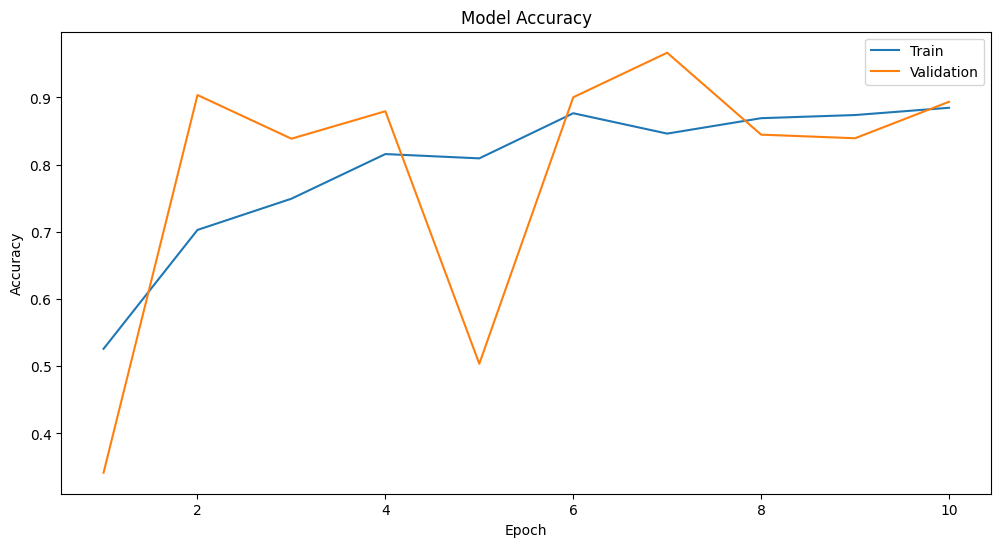

In [158]:

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history_df['epoch'], history_df['accuracy'], label='Train')
plt.plot(history_df['epoch'], history_df['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

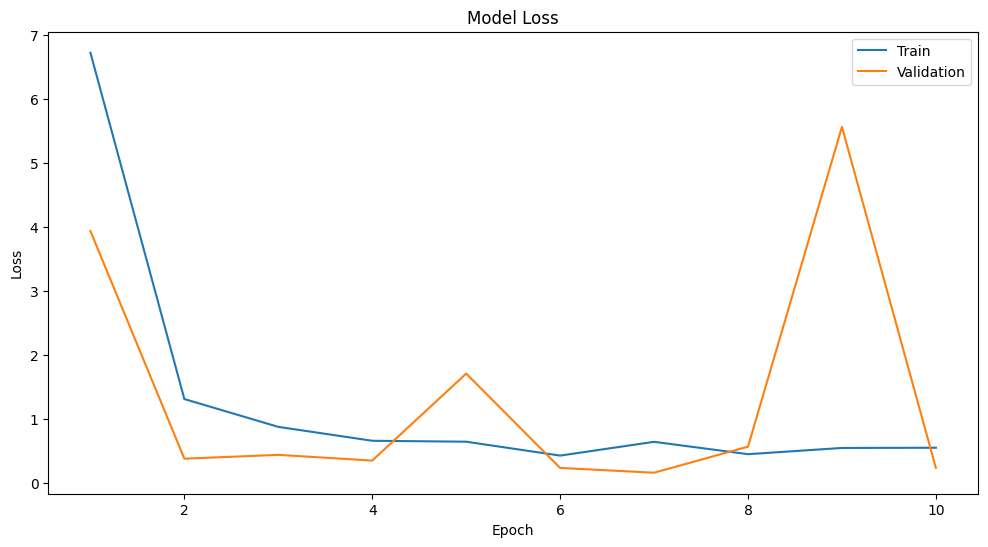

In [159]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history_df['epoch'], history_df['loss'], label='Train')
plt.plot(history_df['epoch'], history_df['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

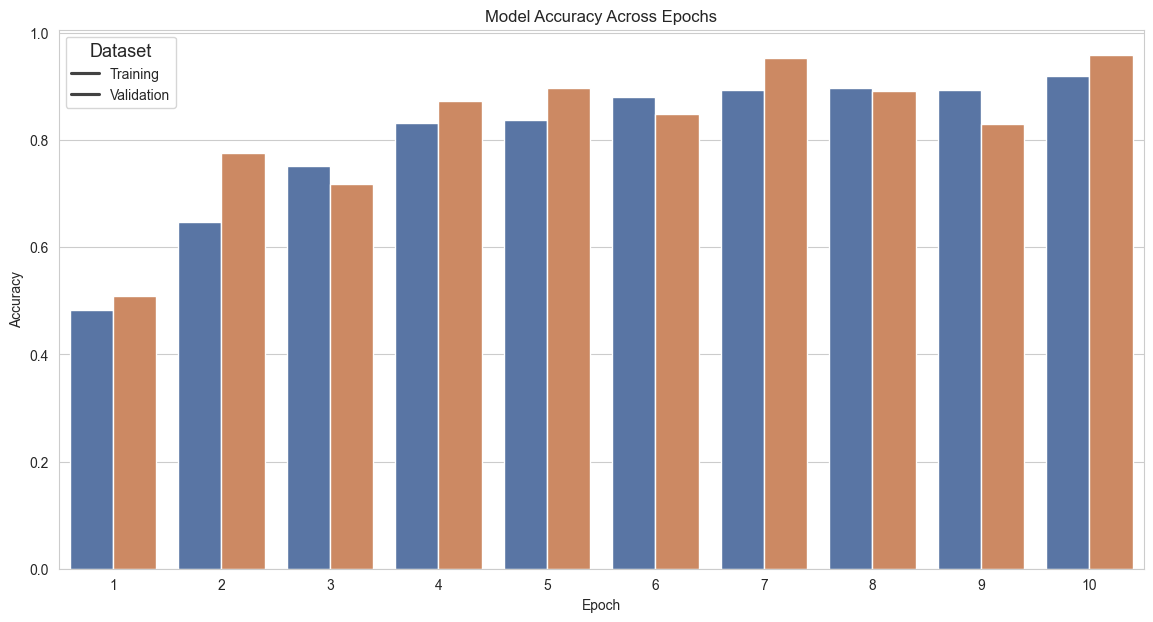

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Prepare data for plotting
# Melt the dataframe to long format for easier plotting with seaborn
plot_data = history_df.melt(id_vars=['epoch'], value_vars=['accuracy', 'val_accuracy'], 
                            var_name='Type', value_name='Accuracy')

# Use seaborn to create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(data=plot_data, x='epoch', y='Accuracy', hue='Type', palette='deep')

# Adding aesthetics
sns.set_style("whitegrid")
plt.title('Model Accuracy Across Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(title='Dataset', title_fontsize='13', loc='upper left', labels=['Training', 'Validation'])

plt.show()


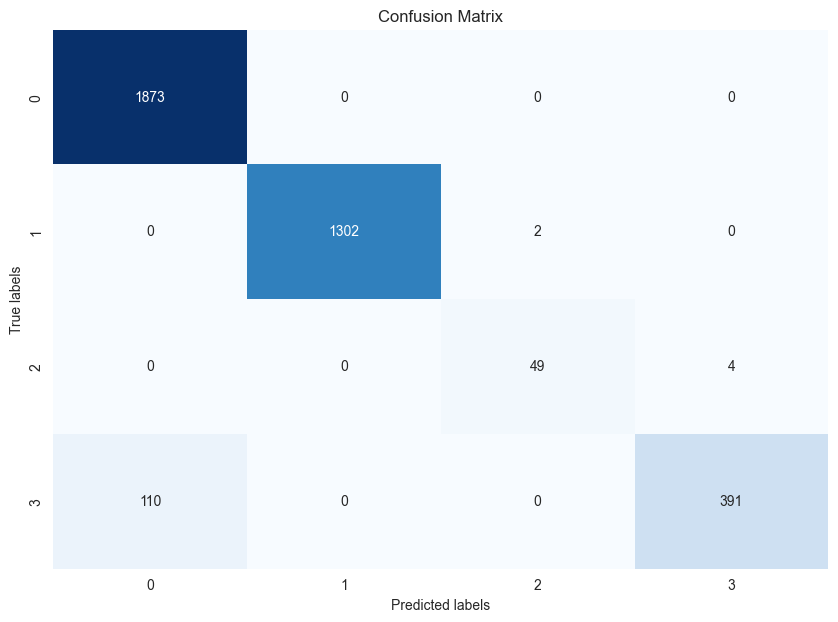

In [189]:
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()